In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

## **Load the data and inspect**

In [2]:
# load data
data = pd.read_csv('housing.csv')

In [3]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
# check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# convert ocean_proximity to a numerical column
data['ocean_proximity_encoded'] = data['ocean_proximity'].astype('category').cat.codes


In [7]:
# copy data and drop ocean_proximity column
housing = data
del housing['ocean_proximity']

## **Fill null values in "total_bedrooms" with the median value from that column**

In [8]:
median = housing["total_bedrooms"].median()
housing.fillna(median, inplace=True)

In [9]:
# check that there are no null values in the data anymore
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20640 non-null  float64
 1   latitude                 20640 non-null  float64
 2   housing_median_age       20640 non-null  float64
 3   total_rooms              20640 non-null  float64
 4   total_bedrooms           20640 non-null  float64
 5   population               20640 non-null  float64
 6   households               20640 non-null  float64
 7   median_income            20640 non-null  float64
 8   median_house_value       20640 non-null  float64
 9   ocean_proximity_encoded  20640 non-null  int8   
dtypes: float64(9), int8(1)
memory usage: 1.4 MB


## **Visualize data**

### **Explore Relationships Between Variables**

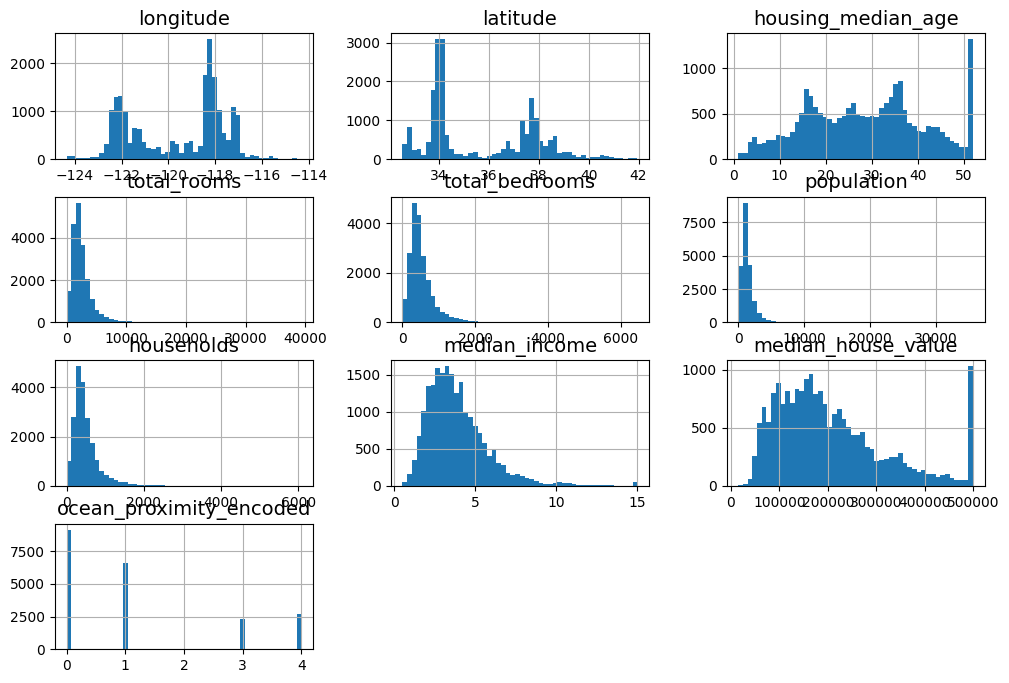

In [10]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

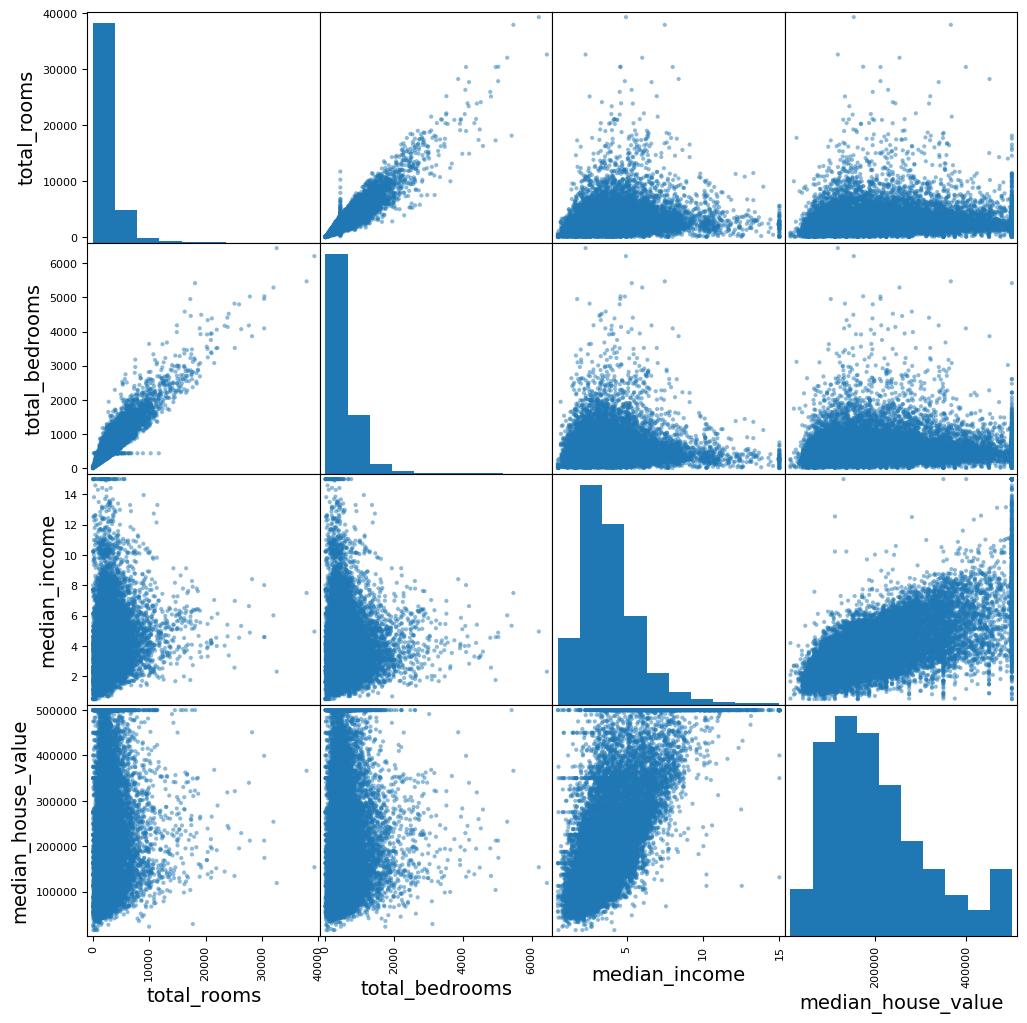

In [11]:
# commented out columns that seemed to have no correlation with the others
attrs = [
    # 'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    # 'population',
    # 'households',
    'median_income',
    'median_house_value',
    ]
scatter_matrix(housing[attrs], figsize=(12, 12))
plt.show()

In [12]:
# create correlation matrix
correlation_matrix = housing.corr()

In [13]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
total_rooms                0.134153
housing_median_age         0.105623
ocean_proximity_encoded    0.081750
households                 0.065843
total_bedrooms             0.049457
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
Name: median_house_value, dtype: float64

### **Categorical Attribute Analysis**

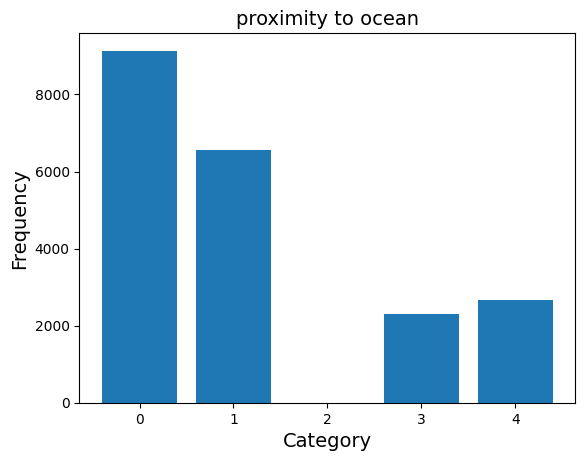

In [14]:
category_counts = housing['ocean_proximity_encoded'].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('proximity to ocean')
plt.show()

In [15]:
cross_tab = pd.crosstab(index=housing['ocean_proximity_encoded'], columns=data['median_house_value'])
cross_tab

median_house_value,14999.0,17500.0,22500.0,25000.0,26600.0,26900.0,27500.0,28300.0,30000.0,32500.0,...,497400.0,497600.0,498400.0,498600.0,498700.0,498800.0,499000.0,499100.0,500000.0,500001.0
ocean_proximity_encoded,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,9,532
1,4,0,2,1,1,1,1,0,2,3,...,0,0,0,0,0,0,0,0,1,27
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,8,194
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,9,212


In [16]:
# Optional: Create a bar chart from the cross-tabulation
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Frequency of Category 2')
plt.title('Cross-tabulation of Category 1 and Category 2')
plt.show()

ValueError: Image size of 585x110459 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

## **Feature Engineering**

In [17]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [18]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,5.329513,0.219892,2.123209


In [19]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
rooms_per_house            0.151948
total_rooms                0.134153
housing_median_age         0.105623
ocean_proximity_encoded    0.081750
households                 0.065843
total_bedrooms             0.049457
people_per_house          -0.023737
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
bedrooms_ratio            -0.233303
Name: median_house_value, dtype: float64